# Question #4 Analysis

#### This project uses scraped data from ESPN in conjunction with a key statistics csv file found on Kaggle to analyze how attendance trends have changed over time along with what ket statistics effect attendance numbers.#

#### Attendence Data: https://www.espn.com/nfl/attendance/_/year/20XX (with the XX depending on what year)
#### Statistics Data: https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023

#### This notebook contains the analysis for question #4 in our report

In [3]:
# import required libraies 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
# read in the csv file

merged_df = pd.read_csv('final_df')

In [5]:
# Create top 10 Dataframe

# Calculate the overall average attendance for each team & filter to the top 10
avg_attendance_per_team = merged_df.groupby('team')['Average Fan Attendance'].mean()

sorted_avg_attendance = avg_attendance_per_team.sort_values(ascending=False)

top_10_teams = sorted_avg_attendance.head(10)

top_10_teams_df = top_10_teams.reset_index()

In [6]:
# Create Bottom 10 Dataframe

# Using the average attendance from above get the bottom 10
sorted_avg_attendance = avg_attendance_per_team.sort_values(ascending=True)

bottom_10_teams = sorted_avg_attendance.head(10)

bottom_10_teams_df = bottom_10_teams.reset_index()

#### Analysis Question #4: Is there a strong correlation between turnovers and attendance in that year? 

In [8]:
# Calculate the correlation between 'turnovers' and 'Average Fan Attendance'
correlation = merged_df[['turnovers', 'Average Fan Attendance']].corr()
print(correlation)

                        turnovers  Average Fan Attendance
turnovers                1.000000               -0.102379
Average Fan Attendance  -0.102379                1.000000


In [9]:
# Run a correlation test
correlation_coefficient, p_value = stats.pearsonr(merged_df['turnovers'], merged_df['Average Fan Attendance'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: -0.10237871259802803
P-value: 0.04727786706306499
The correlation is statistically significant.


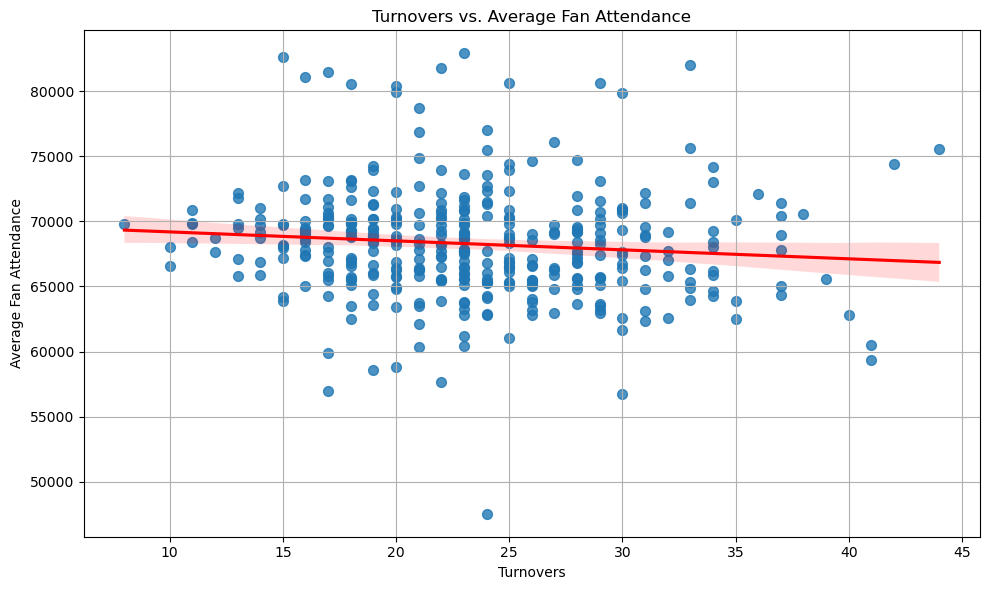

In [10]:
# Create the scatter plot with a trend line (regression line)
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='turnovers', y='Average Fan Attendance', scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Turnovers vs. Average Fan Attendance')
plt.xlabel('Turnovers')
plt.ylabel('Average Fan Attendance')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Top 10 Analysis

In [12]:
top_10_teams_df = merged_df[merged_df['team'].isin(top_10_teams.index)]

In [13]:
# merged the top 10 dataframe to include win_loss_perc

top_10_teams_df = top_10_teams_df[['team', 'year', 'win_loss_perc', 'Average Fan Attendance','turnovers']]

In [14]:
# Calculate the correlation between Turnovers and Fan Attendance

correlation = top_10_teams_df[['turnovers', 'Average Fan Attendance']].corr()
print(correlation)

                        turnovers  Average Fan Attendance
turnovers                1.000000                0.049692
Average Fan Attendance   0.049692                1.000000


In [15]:
# Run Pearson correlation test

correlation_coefficient, p_value = stats.pearsonr(top_10_teams_df['turnovers'], top_10_teams_df['Average Fan Attendance'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: 0.049691512238200286
P-value: 0.574493946694463
The correlation is not statistically significant.


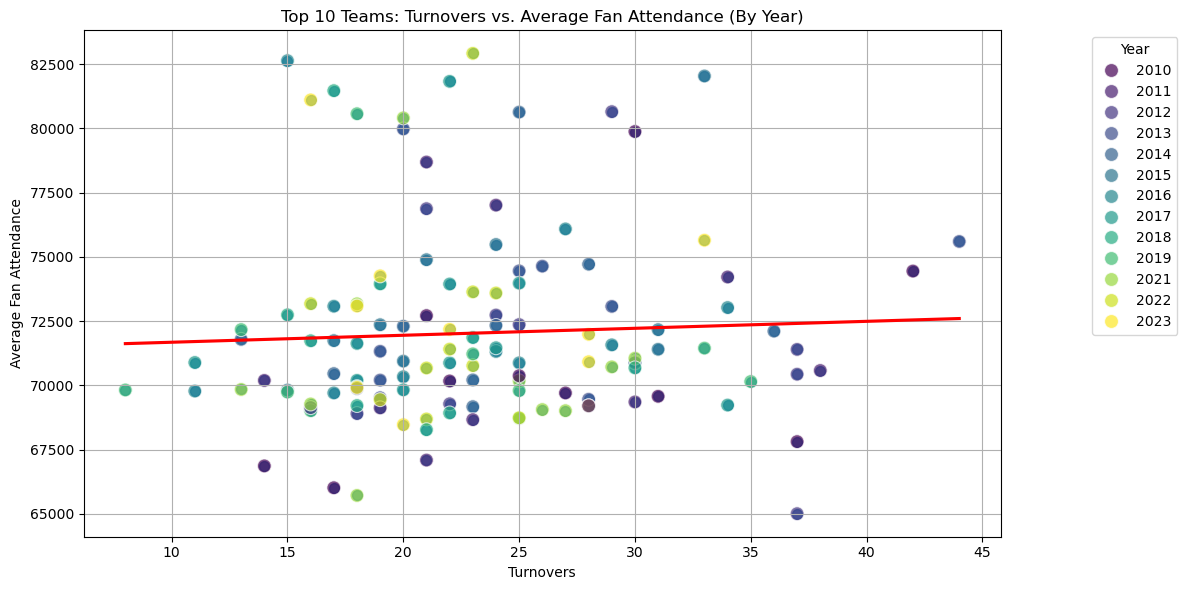

In [16]:
# Create the scatter plot with a trend line, and color points by year

plt.figure(figsize=(12, 6))
sns.regplot(
    data=top_10_teams_df, 
    x='turnovers', 
    y='Average Fan Attendance', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red'}, 
    ci=None,
    fit_reg=True
)

sns.scatterplot(
    data=top_10_teams_df,
    x='turnovers',
    y='Average Fan Attendance',
    hue='year',
    palette='viridis',
    legend='full',
    alpha=0.7,
    s=100,
)

plt.title('Top 10 Teams: Turnovers vs. Average Fan Attendance (By Year)')
plt.xlabel('Turnovers')
plt.ylabel('Average Fan Attendance')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

#### Bottom 10 Analysis

In [18]:
bottom_10_teams_df = merged_df[merged_df['team'].isin(bottom_10_teams.index)]

In [19]:
# merged the top 10 dataframe to include win_loss_perc

bottom_10_teams_df = bottom_10_teams_df[['team', 'year', 'win_loss_perc', 'Average Fan Attendance','turnovers']]

In [20]:
bottom_10_teams_df.columns

Index(['team', 'year', 'win_loss_perc', 'Average Fan Attendance', 'turnovers'], dtype='object')

In [21]:
# Calculate the correlation between 'win_loss_perc' and 'Average Fan Attendance'

correlation = bottom_10_teams_df[['turnovers', 'Average Fan Attendance']].corr()
print(correlation)

                        turnovers  Average Fan Attendance
turnovers                1.000000               -0.109858
Average Fan Attendance  -0.109858                1.000000


In [22]:
# Run Pearson correlation test

correlation_coefficient, p_value = stats.pearsonr(bottom_10_teams_df['turnovers'], bottom_10_teams_df['Average Fan Attendance'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson Correlation Coefficient: -0.10985841174297864
P-value: 0.2322975001279122
The correlation is not statistically significant.


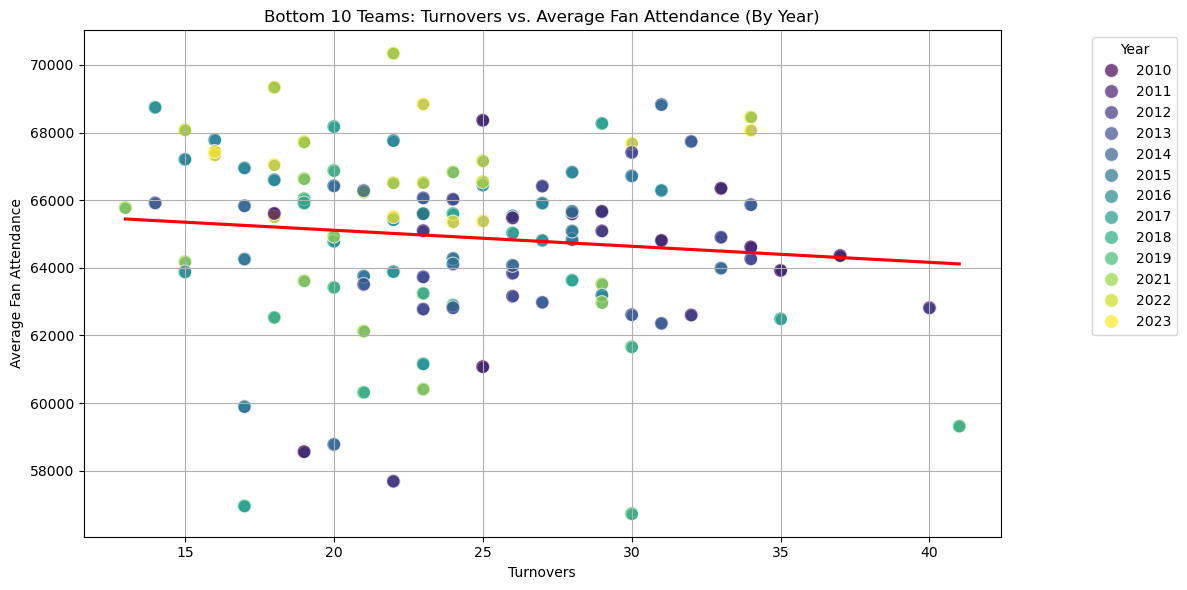

In [23]:
# Create the scatter plot with a trend line, and color points by year

plt.figure(figsize=(12, 6))
sns.regplot(
    data=bottom_10_teams_df, 
    x='turnovers', 
    y='Average Fan Attendance', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red'}, 
    ci=None,
    fit_reg=True
)

sns.scatterplot(
    data=bottom_10_teams_df,
    x='turnovers',
    y='Average Fan Attendance',
    hue='year',
    palette='viridis',
    legend='full',
    alpha=0.7,
    s=100,
)

plt.title('Bottom 10 Teams: Turnovers vs. Average Fan Attendance (By Year)')
plt.xlabel('Turnovers')
plt.ylabel('Average Fan Attendance')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()

plt.show()